In [70]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [17]:
df1 = pd.read_csv("sim_data_0c36f501-afd1-ee11-aa11-b88303911bc1.csv")
df2 = pd.read_csv("sim_data_d6f3a939-bfd1-ee11-aa11-b88303911bc1.csv")
df = pd.concat([df1,df2], ignore_index=True)

In [18]:
df = df[df["scenario_number"]==0]

In [19]:
df.columns

Index(['iptsc_rdts_used', 'iptsc_drugs_used_school', 'cases_treated',
       'severe_cases_treated', 'received_smc_u5', 'received_smc_5-10',
       'received_smc_10-15', 'received_ivermectin', 'received_primaquine',
       'pfpr0_5', 'pfpr2_10', 'pfpr6_15', 'pfpr16_500', 'pfpr_all',
       'clinical_incidence0_5', 'clinical_incidence2_10',
       'clinical_incidence6_15', 'clinical_incidence16_500',
       'clinical_incidence_all', 'severe_incidence0_5', 'severe_incidence2_10',
       'severe_incidence6_15', 'severe_incidence16_500',
       'severe_incidence_all', 'pop0_5', 'pop2_10', 'pop6_15', 'pop16_500',
       'pop_all', 'avg_age', 'avg_age_clinical_cases', 'avg_age_severe_cases',
       'sim_id', 'archetype', 'baseline_transmission_metric', 'Run_Number',
       'scenario_number', 'transmission_level'],
      dtype='object')

In [27]:
agg_df = df.groupby(["archetype", "transmission_level"])\
.agg(clinical_incidence_all_MEAN=("clinical_incidence_all", "mean"),
     clinical_incidence_all_STD=("clinical_incidence_all", "std"),
     clinical_incidence0_5_MEAN=("clinical_incidence0_5", "mean"),
     clinical_incidence0_5_STD=("clinical_incidence0_5", "std"),
     clinical_incidence6_15_MEAN=("clinical_incidence6_15", "mean"),
     clinical_incidence6_15_STD=("clinical_incidence6_15", "std"),
     clinical_incidence16_500_MEAN=("clinical_incidence16_500", "mean"),
     clinical_incidence16_500_STD=("clinical_incidence16_500", "std"),
    ).reset_index()

In [28]:
agg_df

,archetype,transmission_level,clinical_incidence_all_MEAN,clinical_incidence_all_STD,clinical_incidence0_5_MEAN,clinical_incidence0_5_STD,clinical_incidence6_15_MEAN,clinical_incidence6_15_STD,clinical_incidence16_500_MEAN,clinical_incidence16_500_STD
0,Central,0.05,1.205884,0.034020,1.075496,0.046888,1.927962,0.055464,0.933443,0.028560
1,Central,0.10,1.187838,0.030774,1.352028,0.051297,2.081623,0.054987,0.763989,0.020481
2,Central,0.20,1.336877,0.020639,2.271592,0.055166,2.569378,0.044954,0.514234,0.014285
3,Central,0.30,1.395038,0.017776,2.964917,0.052264,2.590742,0.041037,0.346863,0.009459
4,Central,0.40,1.431985,0.016772,3.695807,0.056870,2.498014,0.035546,0.237899,0.008928
5,Sahel,0.05,0.534534,0.051675,0.459516,0.046868,0.892795,0.078176,0.401394,0.044266
6,Sahel,0.10,0.740143,0.032501,0.862021,0.047911,1.382494,0.057749,0.428973,0.022347
7,Sahel,0.20,0.906949,0.023306,1.431745,0.052315,1.785421,0.046018,0.349763,0.012935
8,Sahel,0.30,1.036275,0.024438,2.152808,0.065723,2.037584,0.044479,0.267568,0.011863
9,Sahel,0.40,1.156133,0.019946,2.861629,0.066984,2.138002,0.037796,0.160907,0.007242


meta NOT subset; don't know how to subset; dropped


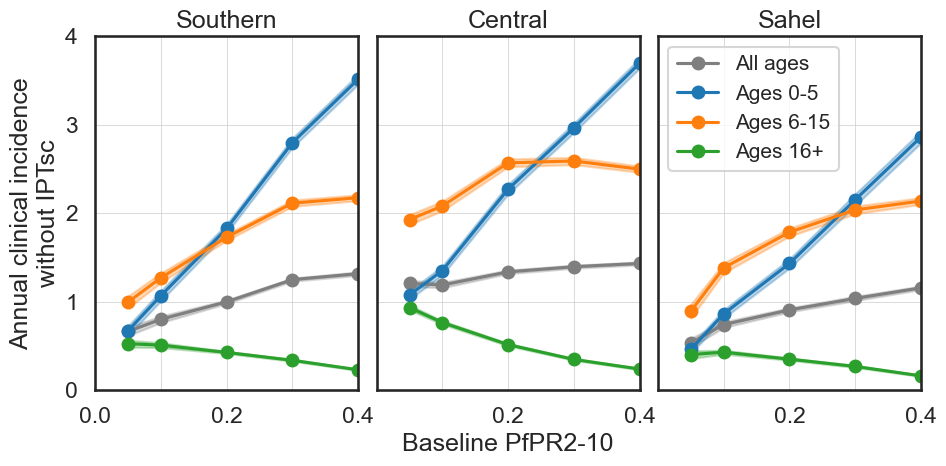

In [88]:
color_dict = {
    "all": "C7",
    "u5": "C0",
    "schoolage": "C1",
    "adult": "C2"
}

archetype_ordered_list = ["Southern", "Central", "Sahel"]

plt.figure(figsize=(10,5))

for i,a in enumerate(archetype_ordered_list):
    sdf = agg_df[agg_df["archetype"]==a]
    
    plt.subplot(1,3,i+1)
    plt.plot(sdf["transmission_level"], sdf["clinical_incidence_all_MEAN"],
            c=color_dict["all"], marker='o', label="All ages")
    plt.fill_between(sdf["transmission_level"], 
                     sdf["clinical_incidence_all_MEAN"]-sdf["clinical_incidence_all_STD"],
                     sdf["clinical_incidence_all_MEAN"]+sdf["clinical_incidence_all_STD"],
                     color=color_dict["all"], alpha=0.3
                    )
    
    plt.plot(sdf["transmission_level"], sdf["clinical_incidence0_5_MEAN"],
            c=color_dict["u5"], marker='o', label="Ages 0-5")
    plt.fill_between(sdf["transmission_level"], 
                     sdf["clinical_incidence0_5_MEAN"]-sdf["clinical_incidence0_5_STD"],
                     sdf["clinical_incidence0_5_MEAN"]+sdf["clinical_incidence0_5_STD"],
                     color=color_dict["u5"], alpha=0.3
                    )
    
    plt.plot(sdf["transmission_level"], sdf["clinical_incidence6_15_MEAN"],
            c=color_dict["schoolage"], marker='o', label="Ages 6-15")
    plt.fill_between(sdf["transmission_level"], 
                     sdf["clinical_incidence6_15_MEAN"]-sdf["clinical_incidence6_15_STD"],
                     sdf["clinical_incidence6_15_MEAN"]+sdf["clinical_incidence6_15_STD"],
                     color=color_dict["schoolage"], alpha=0.3
                    )
    
    plt.plot(sdf["transmission_level"], sdf["clinical_incidence16_500_MEAN"],
            c=color_dict["adult"], marker='o', label="Ages 16+")
    plt.fill_between(sdf["transmission_level"], 
                     sdf["clinical_incidence16_500_MEAN"]-sdf["clinical_incidence16_500_STD"],
                     sdf["clinical_incidence16_500_MEAN"]+sdf["clinical_incidence16_500_STD"],
                     color=color_dict["adult"], alpha=0.3
                    )
    plt.ylim([0,4])
    
    if i+1 == 1:
        plt.ylabel("Annual clinical incidence\nwithout IPTsc")
    
    if i+1 == 2:
        plt.xlabel("Baseline PfPR2-10")
        
    plt.title(a)
    if i+1 == 3:
        plt.legend(fontsize=15, loc=2)
    plt.xlim([0.03,0.4])
    
    # if i == 0:
    #     plt.yticks([0,20,40,60,80,100])
    if i != 0:
        plt.yticks([])
    if i == 0:
        plt.xticks([0,0.2,0.4])
    else:
        plt.xticks([0.2,0.4])
        
    plt.axhline(4, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(3, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(2, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(1, c="#CCCCCB", zorder=0, lw=0.5)

    plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
    # plt.axvline(0.4, c="#CCCCCB", zorder=0)
    plt.xlim([0.0,0.4])
plt.tight_layout(w_pad=0.1,h_pad=0)
plt.savefig("fig_s7_case_denominators.pdf")

C:\Users\joshsu\AppData\Local\Temp\ipykernel_35036\538938402.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, sdf in df.groupby(["archetype"]):


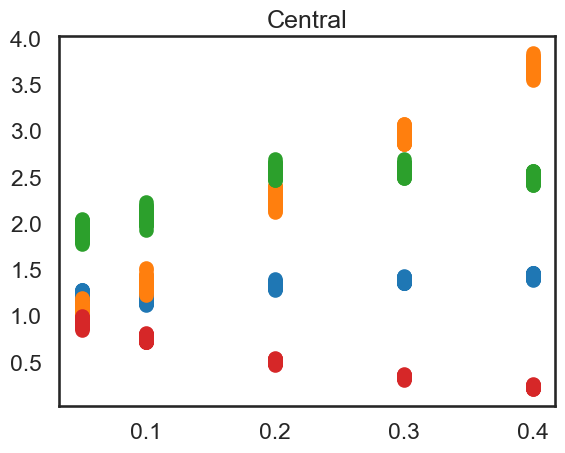

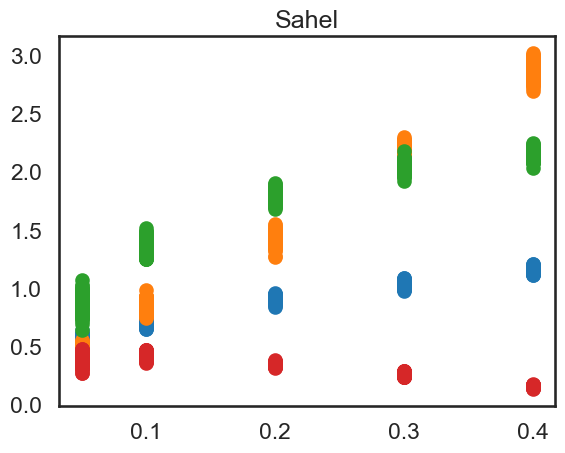

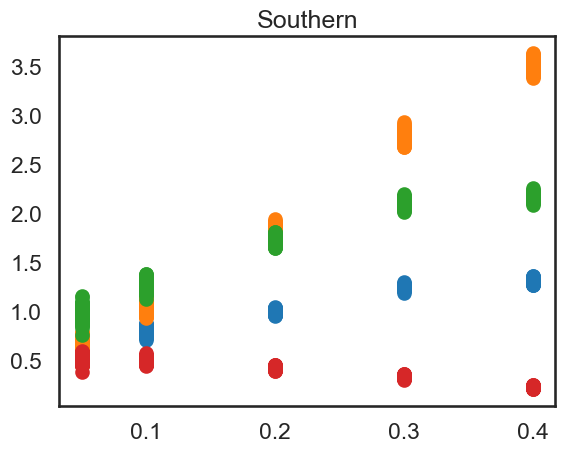

In [20]:
for i, sdf in df.groupby(["archetype"]):
    plt.figure()
    plt.scatter(sdf["transmission_level"], sdf["clinical_incidence_all"])
    plt.scatter(sdf["transmission_level"], sdf["clinical_incidence0_5"])
    plt.scatter(sdf["transmission_level"], sdf["clinical_incidence6_15"])
    plt.scatter(sdf["transmission_level"], sdf["clinical_incidence16_500"])
    plt.title(i)